<a href="https://colab.research.google.com/github/ABHAY1937/NLP/blob/main/twitter_NLP_project_file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#re regular expression
import re 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [ ]:
df=pd.read_csv("/content/twitter_validation.csv",encoding="ISO-8859-1",header=None)
df.columns=["id","location","target","text"]
df.head(10)

,id,location,target,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
5,6273,FIFA,Negative,Hi @EAHelp Iâve had Madeleine McCann in my c...
6,7925,MaddenNFL,Positive,Thank you @EAMaddenNFL!! \n\nNew TE Austin Hoo...
7,11332,TomClancysRainbowSix,Positive,"Rocket League, Sea of Thieves or Rainbow Six: ..."
8,1107,AssassinsCreed,Positive,my ass still knee-deep in Assassins Creed Odys...
9,2069,CallOfDuty,Negative,FIX IT JESUS ! Please FIX IT ! What In the wor...


In [ ]:
df.isna().sum()

id          0
location    0
target      0
text        0
dtype: int64

In [ ]:
df["location"].value_counts()

RedDeadRedemption(RDR)               40
johnson&johnson                      39
FIFA                                 38
PlayerUnknownsBattlegrounds(PUBG)    38
LeagueOfLegends                      37
ApexLegends                          36
TomClancysRainbowSix                 35
Nvidia                               35
GrandTheftAuto(GTA)                  35
Amazon                               34
Fortnite                             34
Facebook                             33
PlayStation5(PS5)                    33
AssassinsCreed                       33
Borderlands                          33
Overwatch                            32
Hearthstone                          32
Verizon                              32
CS-GO                                32
CallOfDuty                           31
Cyberpunk2077                        30
WorldOfCraft                         30
MaddenNFL                            29
Microsoft                            28
Dota2                                27


In [ ]:
t=df["target"].value_counts()
t


Neutral       285
Positive      277
Negative      266
Irrelevant    172
Name: target, dtype: int64

<Axes: xlabel='target', ylabel='count'>

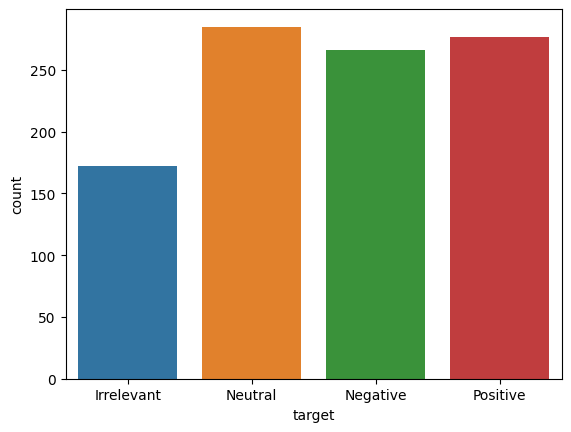

In [ ]:
sns.countplot(x="target",data=df)

In [ ]:
#dropping the values from the column irrelevant 
df.drop(df.index[(df["target"]=="Irrelevant")],axis=0,inplace=True)
df

,id,location,target,text
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
5,6273,FIFA,Negative,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...,...,...
993,314,Amazon,Negative,Please explain how this is possible! How can t...
994,9701,PlayStation5(PS5),Positive,Good on Sony. As much as I want to see the new...
997,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
df["target"].value_counts()

Neutral     285
Positive    277
Negative    266
Name: target, dtype: int64

In [ ]:
#resetting the index after the dropping part
df.reset_index(drop=True,inplace=True)
df

,id,location,target,text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...,...,...
823,314,Amazon,Negative,Please explain how this is possible! How can t...
824,9701,PlayStation5(PS5),Positive,Good on Sony. As much as I want to see the new...
825,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
826,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
#dropping id , and location ,here only needed the text and target
df.drop(["id","location"],axis=1,inplace=True)
df

,target,text
0,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,Negative,@Microsoft Why do I pay for WORD when it funct...
2,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,Neutral,Now the President is slapping Americans in the...
4,Negative,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...
823,Negative,Please explain how this is possible! How can t...
824,Positive,Good on Sony. As much as I want to see the new...
825,Positive,Today sucked so itâs time to drink wine n pl...
826,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
df["target"]=df["target"].map({"Positive":1,"Negative":-1,"Neutral":0})
df

,target,text
0,0,BBC News - Amazon boss Jeff Bezos rejects clai...
1,-1,@Microsoft Why do I pay for WORD when it funct...
2,-1,"CSGO matchmaking is so full of closet hacking,..."
3,0,Now the President is slapping Americans in the...
4,-1,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...
823,-1,Please explain how this is possible! How can t...
824,1,Good on Sony. As much as I want to see the new...
825,1,Today sucked so itâs time to drink wine n pl...
826,1,Bought a fraction of Microsoft today. Small wins.


In [ ]:
#implimenting NLP
import nltk
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("punkt")
nltk.download("omw-1.4")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
tweets=df.text
tweets

0      BBC News - Amazon boss Jeff Bezos rejects clai...
1      @Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking,...
3      Now the President is slapping Americans in the...
4      Hi @EAHelp Iâve had Madeleine McCann in my c...
                             ...                        
823    Please explain how this is possible! How can t...
824    Good on Sony. As much as I want to see the new...
825    Today sucked so itâs time to drink wine n pl...
826    Bought a fraction of Microsoft today. Small wins.
827    Johnson & Johnson to stop selling talc baby po...
Name: text, Length: 828, dtype: object

In [ ]:
#tokenization
from nltk import TweetTokenizer
tk=TweetTokenizer()
tweets=tweets.apply(lambda x:tk.tokenize(x)).apply(lambda x:" ".join(x))
tweets

0      BBC News - Amazon boss Jeff Bezos rejects clai...
1      @Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking ...
3      Now the President is slapping Americans in the...
4      Hi @EAHelp Iâ   ve had Madeleine McCann in m...
                             ...                        
823    Please explain how this is possible ! How can ...
824    Good on Sony . As much as I want to see the ne...
825    Today sucked so itâ   s time to drink wine n...
826    Bought a fraction of Microsoft today . Small w...
827    Johnson & Johnson to stop selling talc baby po...
Name: text, Length: 828, dtype: object

In [ ]:
#Remove special character (using regular expression)
tweets=tweets.str.replace("[^a-zA-Z0-9]+"," ")
tweets

<ipython-input-197-29e64d233626>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  tweets=tweets.str.replace("[^a-zA-Z0-9]+"," ")


0      BBC News Amazon boss Jeff Bezos rejects claims...
1       Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking ...
3      Now the President is slapping Americans in the...
4      Hi EAHelp I ve had Madeleine McCann in my cell...
                             ...                        
823    Please explain how this is possible How can th...
824    Good on Sony As much as I want to see the new ...
825    Today sucked so it s time to drink wine n play...
826     Bought a fraction of Microsoft today Small wins 
827    Johnson Johnson to stop selling talc baby powd...
Name: text, Length: 828, dtype: object

In [ ]:
#replacing startergy 
str1="Wonderful @#$%peacock 1234 !!"
str2=re.sub("[^a-zA-Z0-9]"," ",str1)
str2 # [0-9] [A-Z] [a-z]      # ^ it means its necessory
#+ helps to remove the special charactor like combination of charactors (##########$$$$$$$$$$@@@@@@@@@@@@)

'Wonderful     peacock 1234   '

In [ ]:
#stemming (snowball stemmer) ==> converting to smmal letters
from nltk.stem import SnowballStemmer
stemmer=SnowballStemmer("english")
tweets=tweets .apply(lambda x:[stemmer.stem(i.lower())for i in tk.tokenize(x)]).apply(lambda x : " ".join(x))
tweets

0      bbc news amazon boss jeff bezo reject claim co...
1      microsoft whi do i pay for word when it functi...
2      csgo matchmak is so full of closet hack it s a...
3      now the presid is slap american in the face th...
4      hi eahelp i ve had madelein mccann in my cella...
                             ...                        
823    pleas explain how this is possibl how can they...
824    good on soni as much as i want to see the new ...
825    today suck so it s time to drink wine n play b...
826       bought a fraction of microsoft today small win
827    johnson johnson to stop sell talc babi powder ...
Name: text, Length: 828, dtype: object

In [ ]:
#removing of stop words 
from nltk.corpus import stopwords
stop=stopwords.words("english")
tweets=tweets.apply(lambda x :[i for i in tk.tokenize(x) if i not in stop]).apply(lambda x:" ".join(x))
tweets

0      bbc news amazon boss jeff bezo reject claim co...
1      microsoft whi pay word function poor samsungus...
2           csgo matchmak full closet hack truli aw game
3      presid slap american face realli commit unlaw ...
4      hi eahelp madelein mccann cellar past 13 year ...
                             ...                        
823    pleas explain possibl let compani overcharg sc...
824    good soni much want see new ps5 go right much ...
825    today suck time drink wine n play borderland s...
826            bought fraction microsoft today small win
827    johnson johnson stop sell talc babi powder u c...
Name: text, Length: 828, dtype: object

In [ ]:
#vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
train_data=vec.fit_transform(tweets)
train_data.shape

(828, 3929)

In [ ]:
x=train_data
y=df["target"]

In [ ]:
y.dtypes

dtype('int64')

In [ ]:
y.isna().sum()

0

In [ ]:
#machine learning model
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)
y_train

127    1
452   -1
823   -1
818    0
453   -1
      ..
763    1
192   -1
629    0
559    0
684   -1
Name: target, Length: 579, dtype: int64

In [ ]:
x_train

<579x3929 sparse matrix of type '<class 'numpy.float64'>'
	with 7662 stored elements in Compressed Sparse Row format>

In [ ]:
x_test

<249x3929 sparse matrix of type '<class 'numpy.float64'>'
	with 3345 stored elements in Compressed Sparse Row format>

In [ ]:
y_test

628    1
103    0
8     -1
258    1
626    0
      ..
320    0
140    0
198    1
418    0
590    1
Name: target, Length: 249, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler(with_mean=False)
scalar.fit(x_train)
x_train=scalar.fit_transform(x_train)
x_test=scalar.fit_transform(x_test)


In [ ]:
#model creation
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(max_depth=5)
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=5)

In [ ]:
y_pred=model.predict(x_test)
y_pred

array([ 0, -1, -1,  0,  1,  0, -1,  0,  0, -1,  0, -1, -1, -1,  1,  1, -1,
        0,  0,  0,  0,  1,  0,  1,  0,  0,  1,  0, -1, -1, -1, -1,  0,  0,
       -1, -1, -1,  0, -1,  0,  0,  0,  1, -1,  0,  0, -1,  0, -1, -1,  0,
        1, -1,  1,  0, -1,  1, -1,  1,  0,  1,  1, -1, -1, -1,  1,  0, -1,
        0, -1,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  1,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  1, -1,  1,  0,  0, -1, -1,  0,  0,
       -1,  1, -1,  0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  1, -1,
        0,  0,  0,  0,  0,  0,  1,  1,  0, -1,  0,  0,  1,  1,  0,  0,  1,
        0,  0,  0, -1,  1, -1,  0,  0,  0,  1,  0,  1,  0, -1,  1,  0, -1,
        0,  0,  1,  0,  1, -1,  0,  0, -1, -1,  0, -1,  0,  0, -1,  1,  0,
        0,  1, -1,  0,  1,  0,  1,  1,  1,  0, -1, -1,  1,  0, -1, -1,  0,
        0,  1, -1,  0,  1,  0,  0, -1,  0, -1,  0,  0,  0,  0, -1,  0,  0,
        1,  1,  0,  0, -1, -1, -1,  0,  0,  0,  0,  0, -1, -1, -1,  0,  0,
        0,  0, -1,  0,  0

In [ ]:
y_test

628    1
103    0
8     -1
258    1
626    0
      ..
320    0
140    0
198    1
418    0
590    1
Name: target, Length: 249, dtype: int64

In [ ]:
#confusion matrix , accuracy score , classificaton report
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,ConfusionMatrixDisplay
result=confusion_matrix(y_test,y_pred)
result

array([[39, 24, 12],
       [20, 57,  7],
       [10, 52, 28]])

In [ ]:
score=accuracy_score(y_test,y_pred)
score

0.4979919678714859

[Text(0.963179758308157, 0.9962121212121212, 'x[3579] <= 1.345\ngini = 0.666\nsamples = 374\nvalue = [206, 190, 183]'),
 Text(0.9384441087613293, 0.9886363636363636, 'x[3778] <= 3.304\ngini = 0.665\nsamples = 365\nvalue = [206, 176, 182]'),
 Text(0.9324018126888217, 0.9810606060606061, 'x[1538] <= 2.819\ngini = 0.666\nsamples = 359\nvalue = [199, 176, 182]'),
 Text(0.9010574018126888, 0.9734848484848485, 'x[3685] <= 6.333\ngini = 0.665\nsamples = 337\nvalue = [191, 172, 159]'),
 Text(0.8950151057401813, 0.9659090909090909, 'x[3425] <= 12.042\ngini = 0.664\nsamples = 332\nvalue = [191, 163, 159]'),
 Text(0.8889728096676737, 0.9583333333333334, 'x[1402] <= 2.539\ngini = 0.665\nsamples = 331\nvalue = [184, 163, 159]'),
 Text(0.8829305135951662, 0.9507575757575758, 'x[3084] <= 4.194\ngini = 0.666\nsamples = 325\nvalue = [176, 163, 159]'),
 Text(0.8768882175226587, 0.9431818181818182, 'x[1274] <= 5.025\ngini = 0.666\nsamples = 322\nvalue = [170, 163, 159]'),
 Text(0.870845921450151, 0.93560

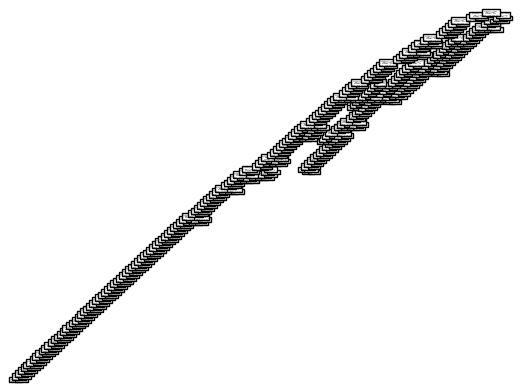

In [ ]:
from sklearn.tree import plot_tree

# create a random forest classifier
clf = RandomForestClassifier(n_estimators=6)
# train the classifier on the dataset
clf.fit(x_train, y_train)

# plot a single decision tree from the random forest
plot_tree(clf.estimators_[0])

In [ ]:
report=classification_report(y_pred,y_test)
report


'              precision    recall  f1-score   support\n\n          -1       0.52      0.57      0.54        69\n           0       0.68      0.43      0.53       133\n           1       0.31      0.60      0.41        47\n\n    accuracy                           0.50       249\n   macro avg       0.50      0.53      0.49       249\nweighted avg       0.57      0.50      0.51       249\n'

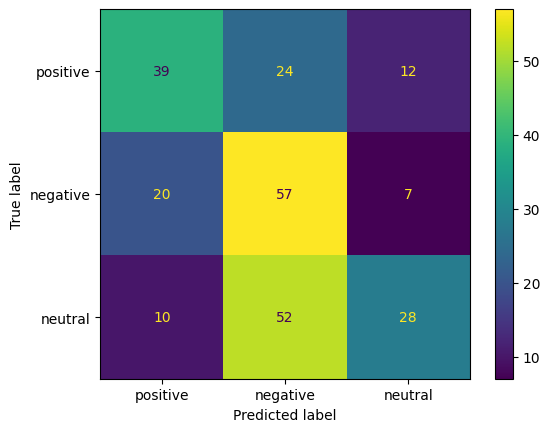

In [ ]:
#plotting confusion matrix display
result=confusion_matrix(y_test,y_pred)
labels=["positive","negative","neutral"]
cmd=ConfusionMatrixDisplay(result,display_labels=labels)
cmd.plot()